In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Display full output in Jupyter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
filepath ="./dat/online_shoppers_intention.csv.gz"
df = pd.read_csv(filepath, compression='gzip')

In [4]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11624,0,0.0,0,0.0,1,0.0,0.2,0.200000,0.0,0.0,Nov,3,2,1,1,Returning_Visitor,False,False
6172,2,67.6,0,0.0,8,183.8,0.0,0.020000,0.0,0.0,Oct,1,1,1,5,New_Visitor,False,False
4473,1,6.4,0,0.0,13,135.0,0.0,0.005556,0.0,0.0,May,3,2,3,4,Returning_Visitor,True,False
6970,1,0.0,0,0.0,28,219.8,0.0,0.037931,0.0,0.0,Nov,2,2,1,1,Returning_Visitor,True,False
2670,0,0.0,0,0.0,3,129.0,0.0,0.100000,0.0,0.0,May,2,2,1,1,Returning_Visitor,True,False


### Task 1 - Classification
(10 points) Basic exploratory data analysis (EDA)

In [5]:
# Lets do some EDA
df.shape

(12330, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Check for missing values
df.isna().sum().sum()

0

In [8]:
# Are there are single value columns?
for col in df.columns:
    print(col, df[col].unique().size)

Administrative 27
Administrative_Duration 3335
Informational 17
Informational_Duration 1258
ProductRelated 311
ProductRelated_Duration 9551
BounceRates 1872
ExitRates 4777
PageValues 2704
SpecialDay 6
Month 10
OperatingSystems 8
Browser 13
Region 9
TrafficType 20
VisitorType 3
Weekend 2
Revenue 2


In [9]:
# There are 10 numerical features
num_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
# There are 7 categorical features
cat_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
# Label is the 8th categorical feature
target = 'Revenue'

In [10]:
# # For ML it is a good idea to convert categorical features to numerical

# # Lets look at non numerical features
# for col in df.columns:
#     if df[col].dtype == 'object' or df[col].dtype == 'bool':
#         print(col, df[col].unique())

In [11]:
# There seem to be no data for the month of January and April. 
# month_str2int = { 'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 }
# df['Month'] = df['Month'].map(month_str2int)

# Dropped the idea as the model was performing worse

In [12]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<AxesSubplot:title={'center':'Sales made by month'}, xlabel='Month', ylabel='Sales'>

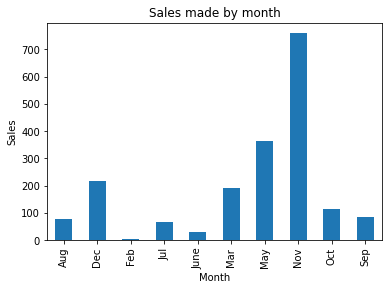

In [13]:
#Visualize sale over the year
sales_by_month = df.groupby('Month')['Revenue'].sum()
sales_by_month.plot(kind='bar', title='Sales made by month', ylabel='Sales', xlabel='Month')

<AxesSubplot:title={'center':'Sales made by visitor type'}, xlabel='VisitorType'>

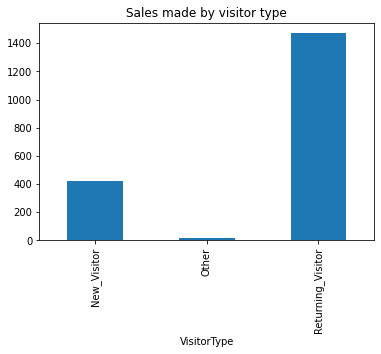

In [14]:
# Sales made by visitor type
df.groupby('VisitorType')['Revenue'].sum().plot(kind='bar', title='Sales made by visitor type')

                                             |          | [  0%]   00:00 -> (? left)


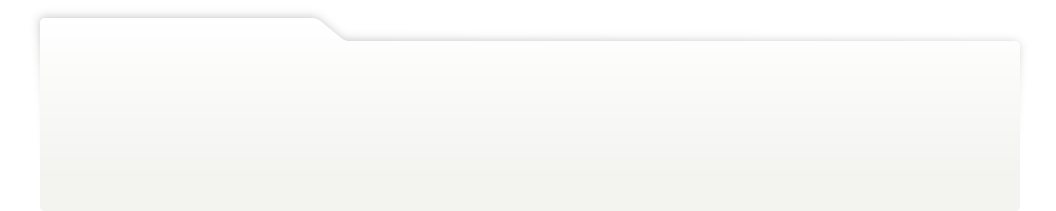
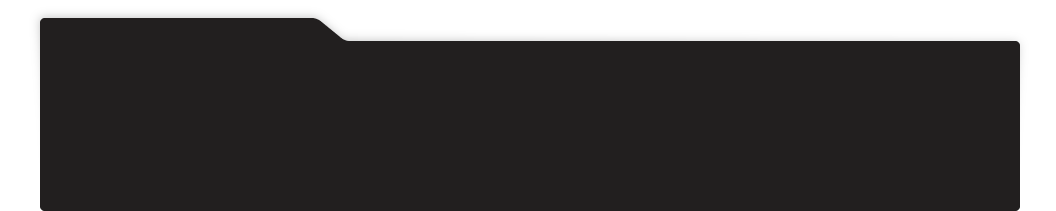
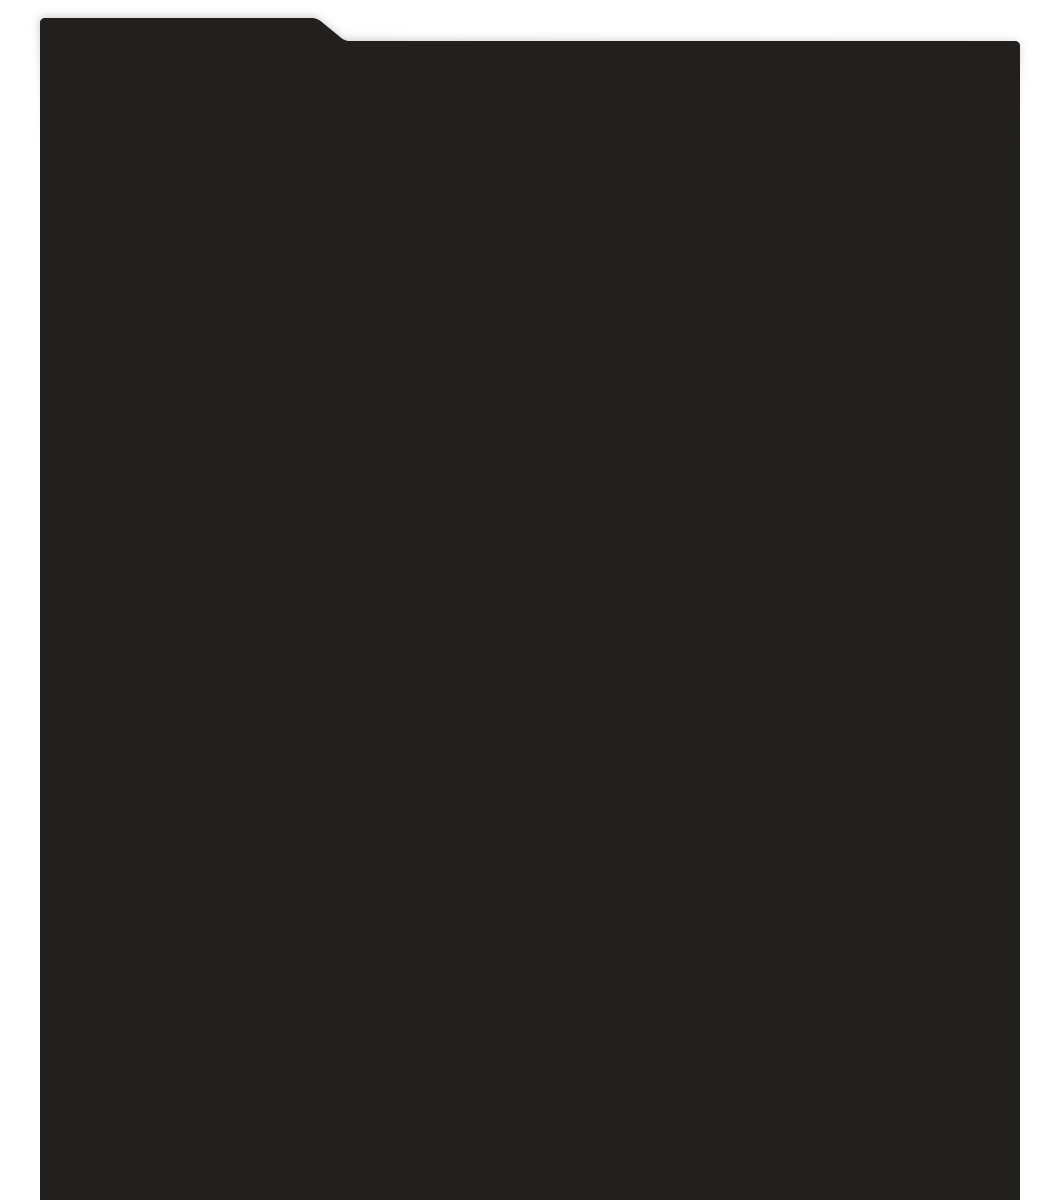
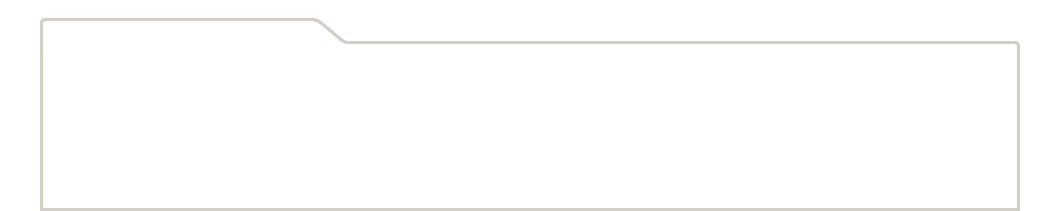
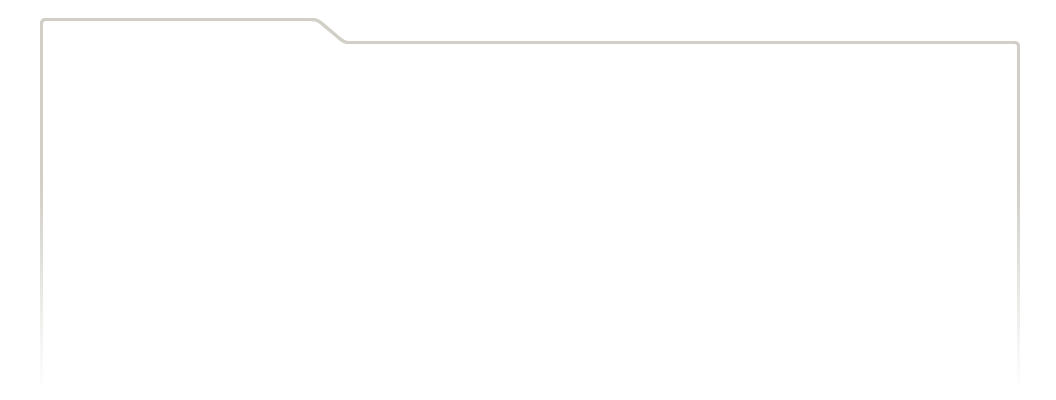
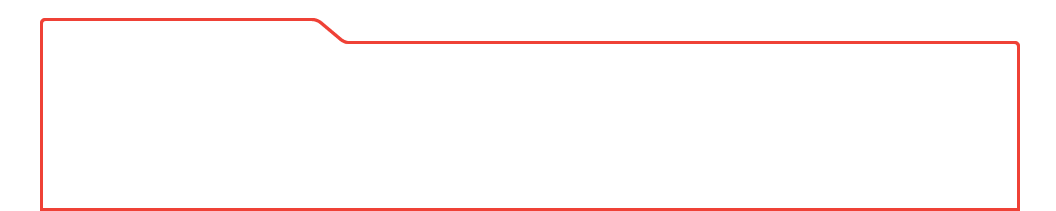
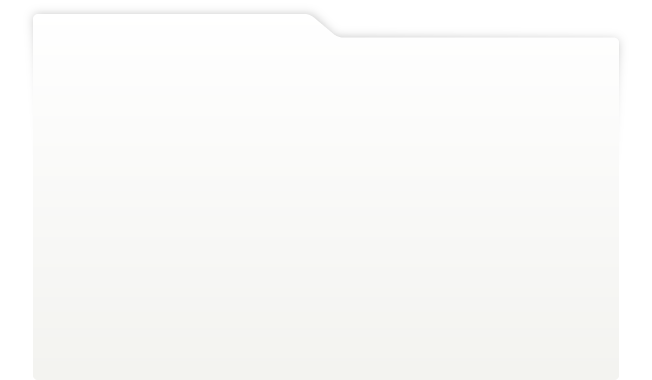
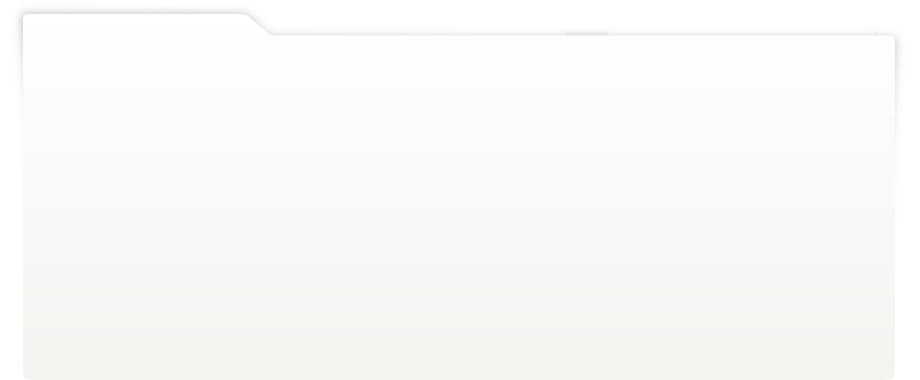
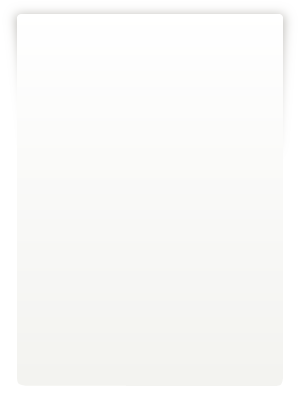
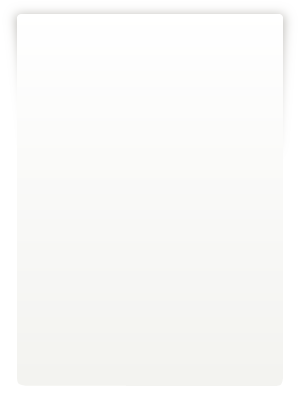
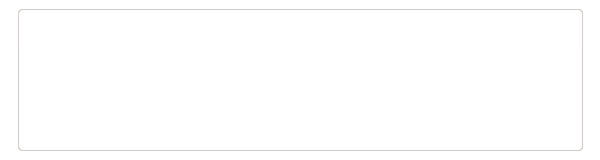
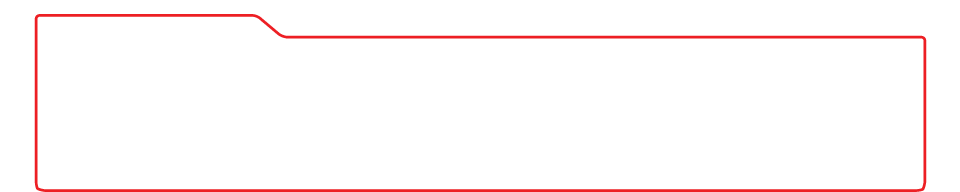
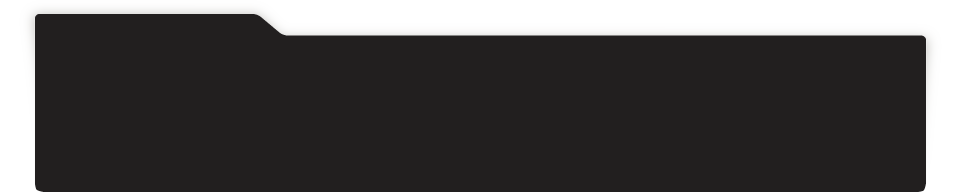
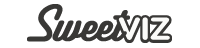
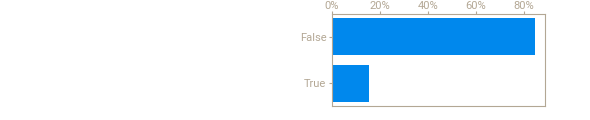
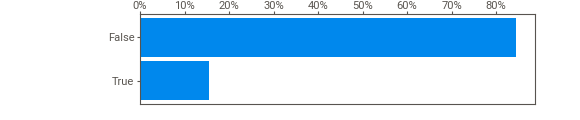
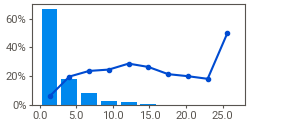
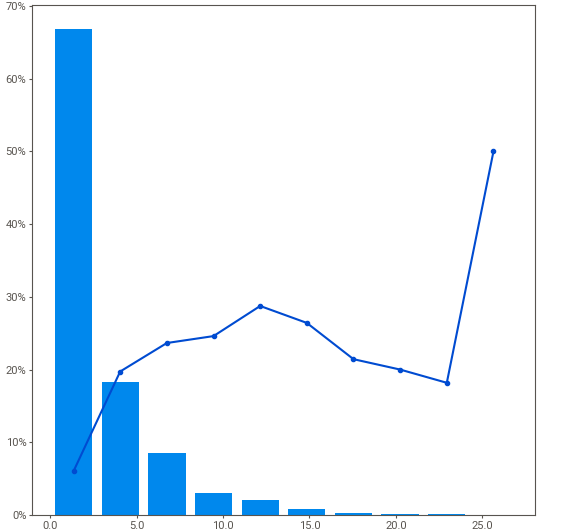
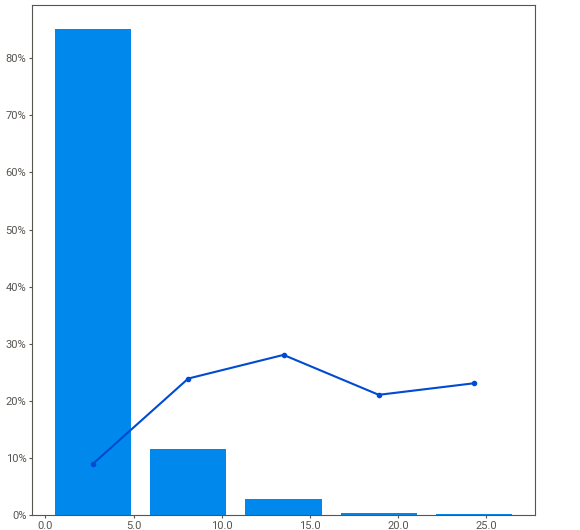
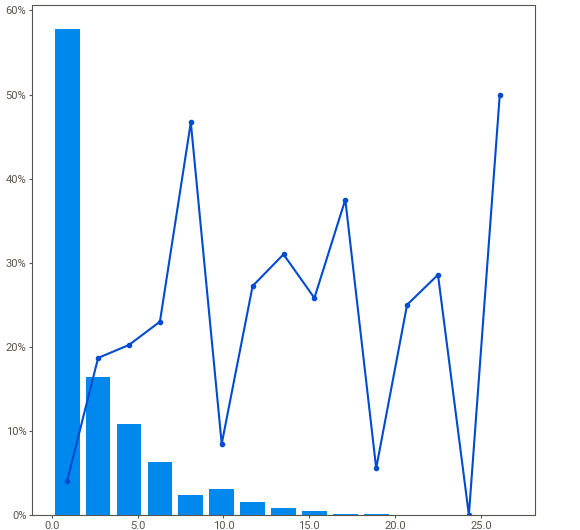
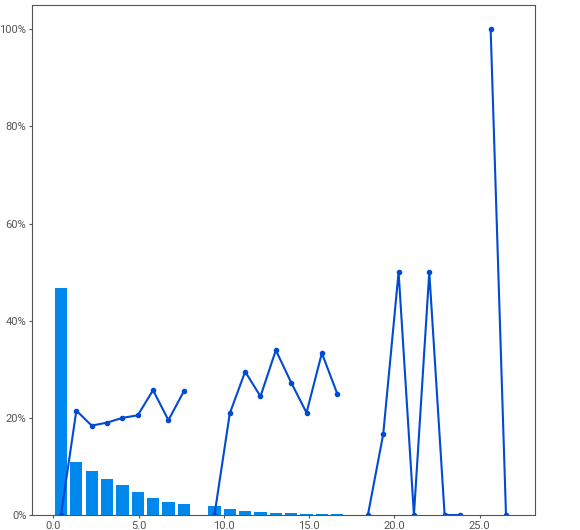
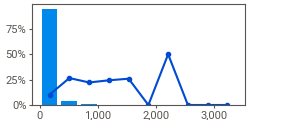
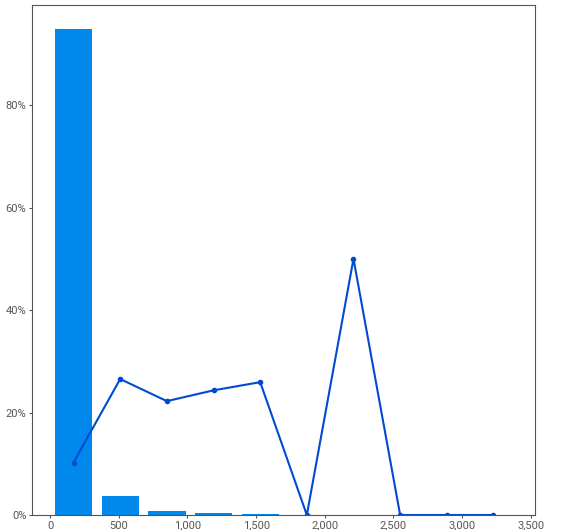
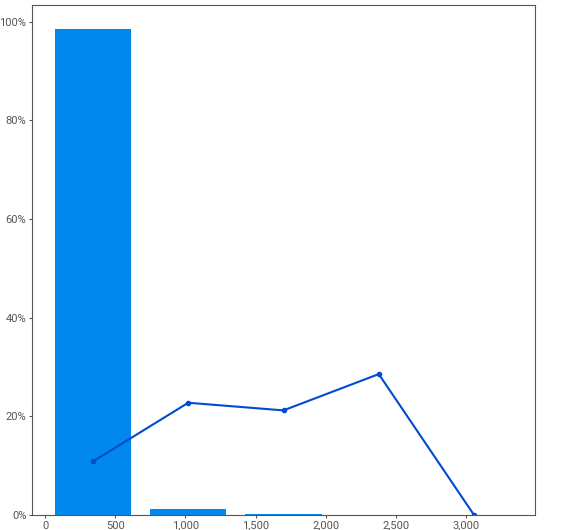
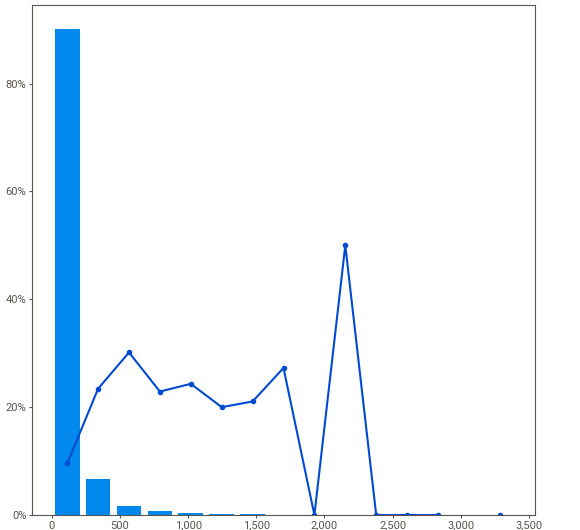
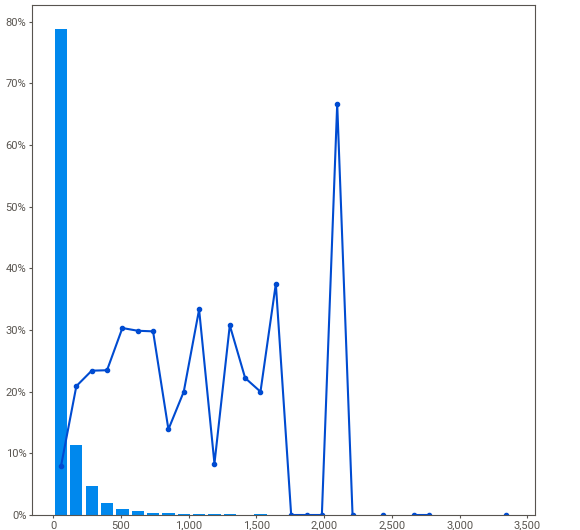
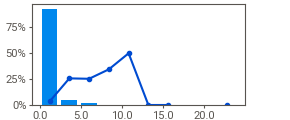
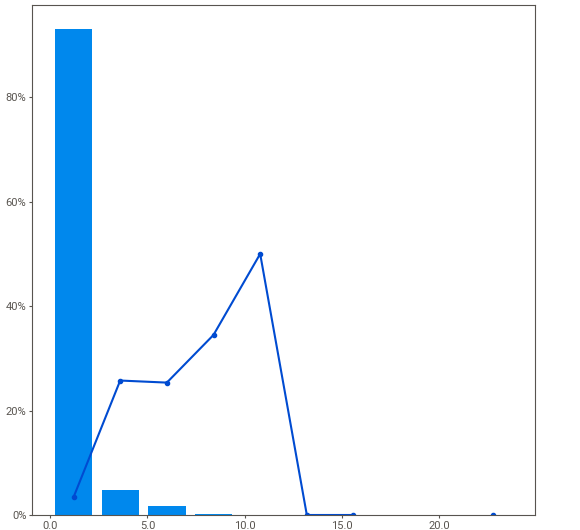
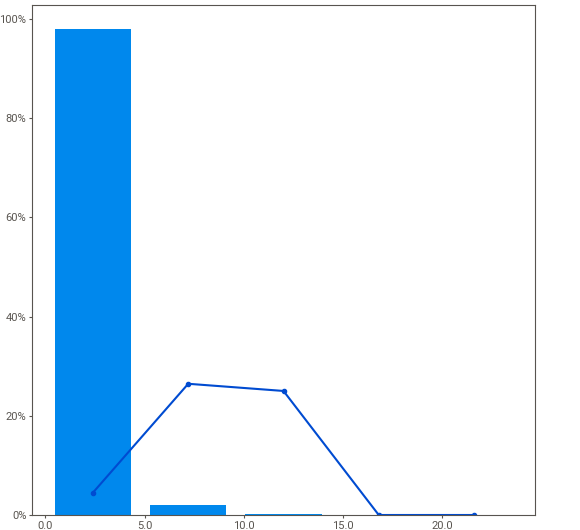
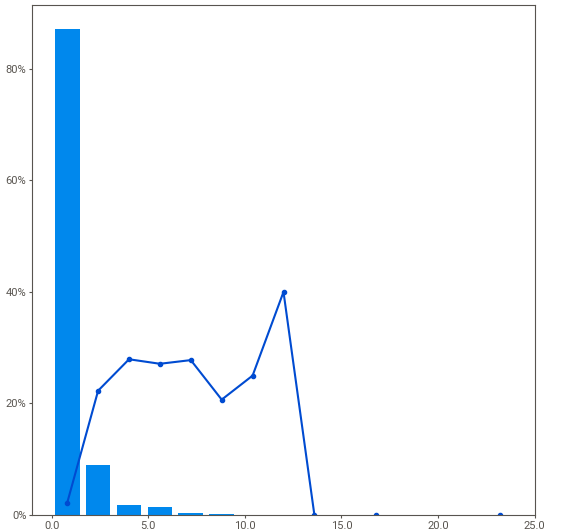
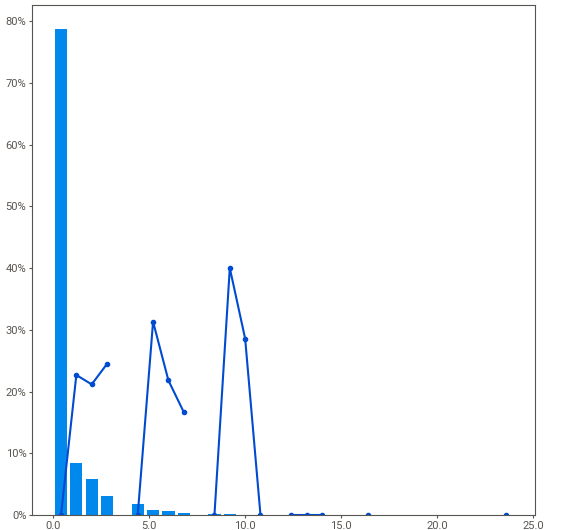
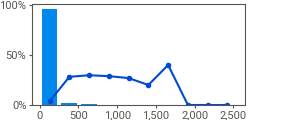
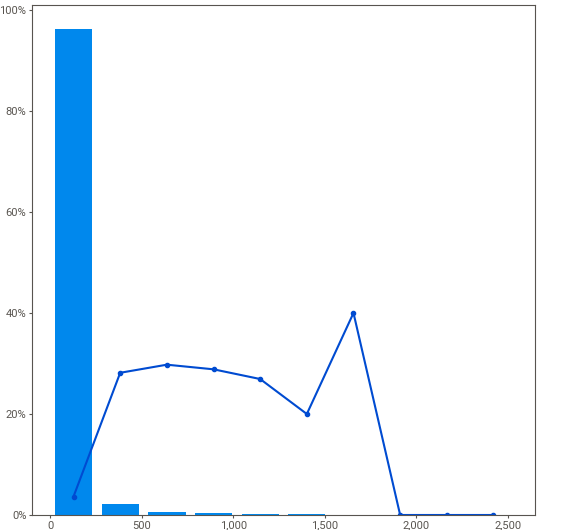
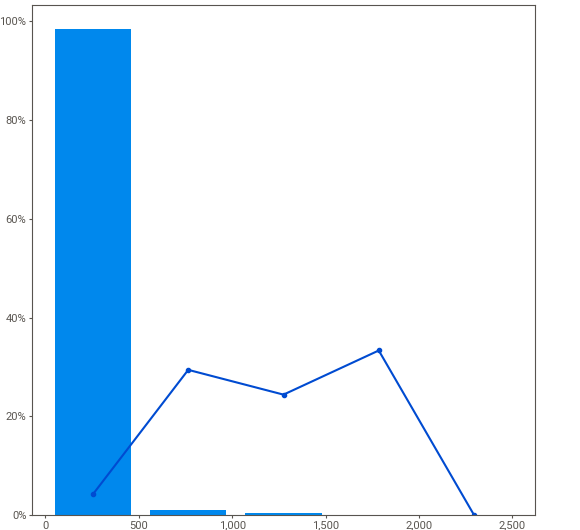
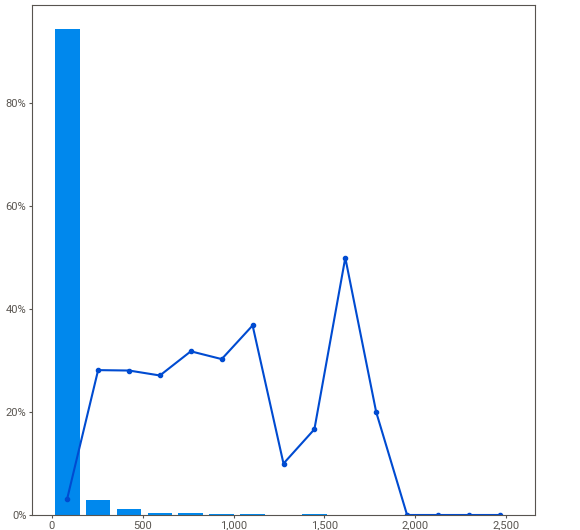
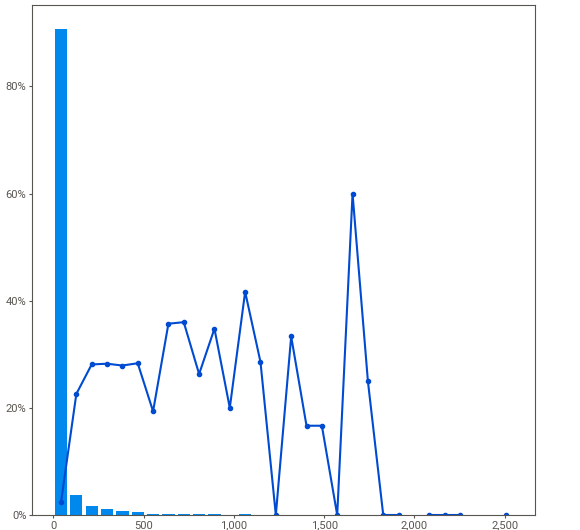
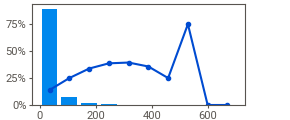
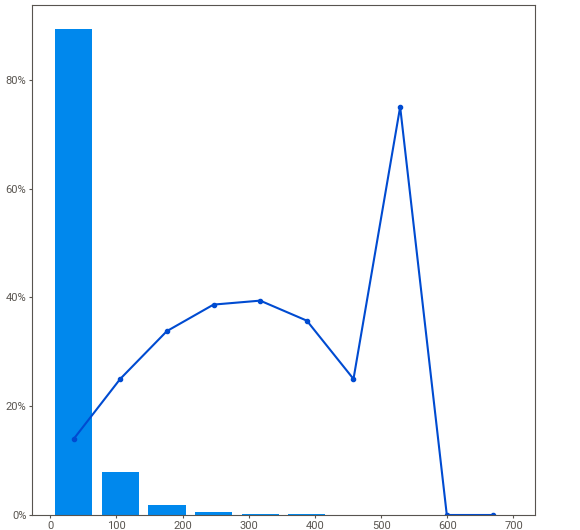
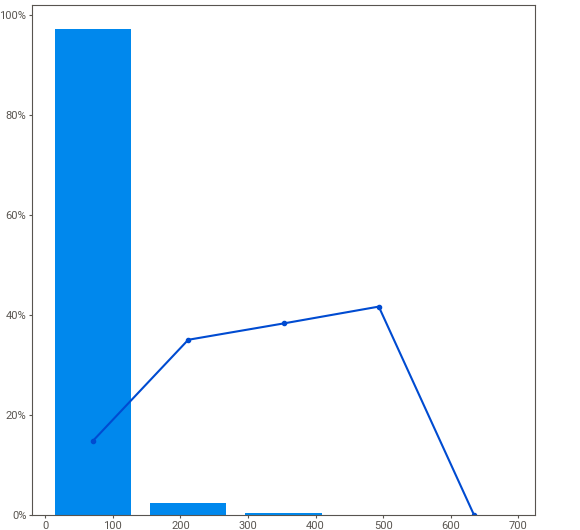
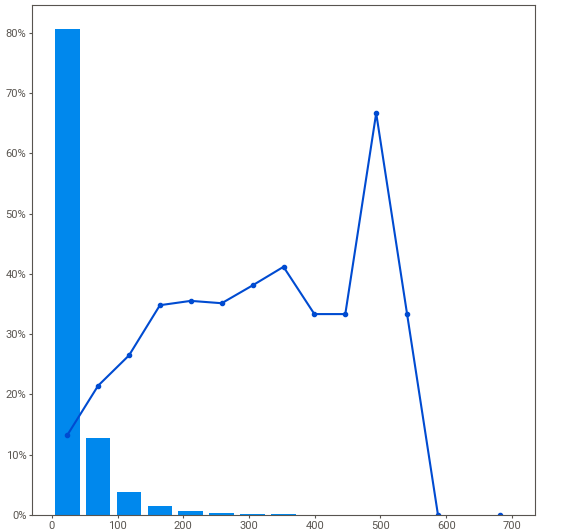
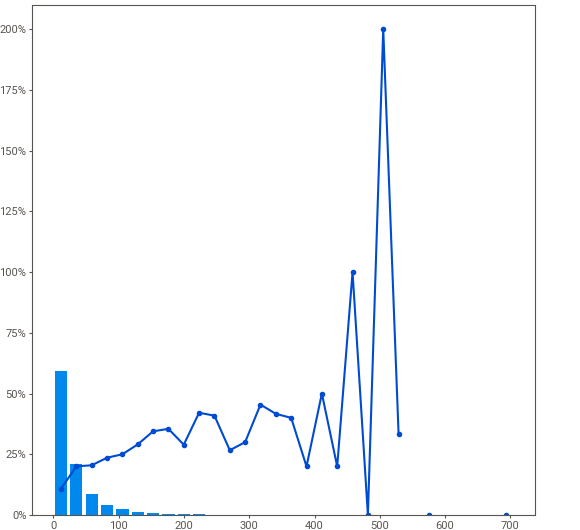
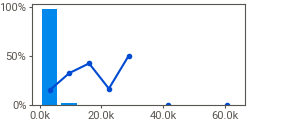
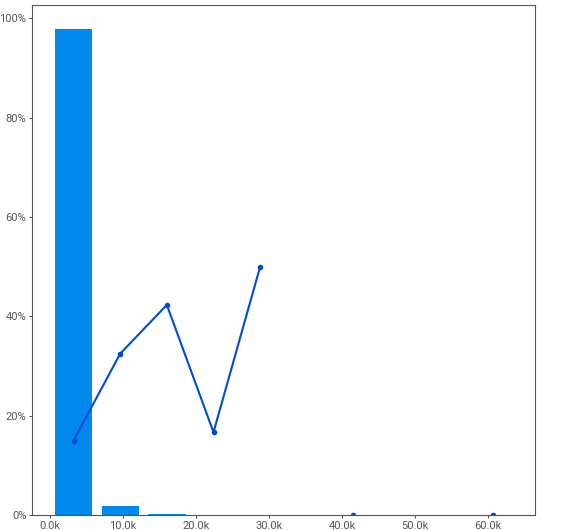
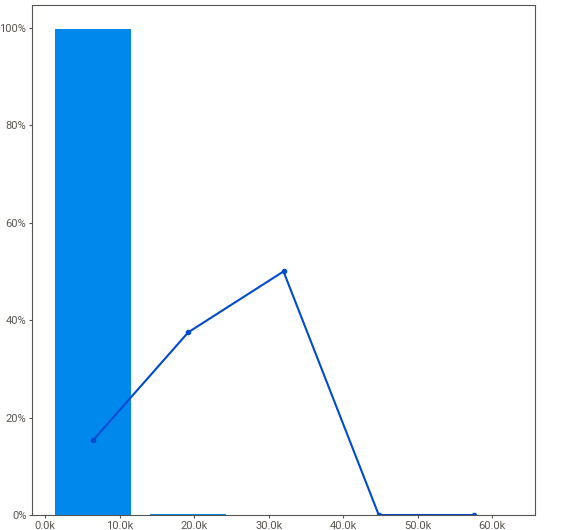
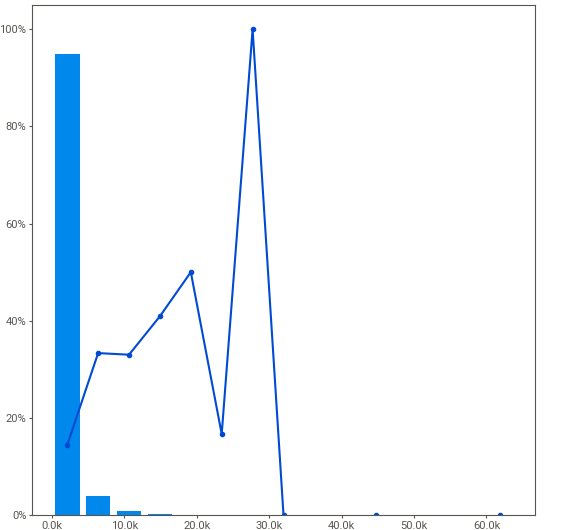
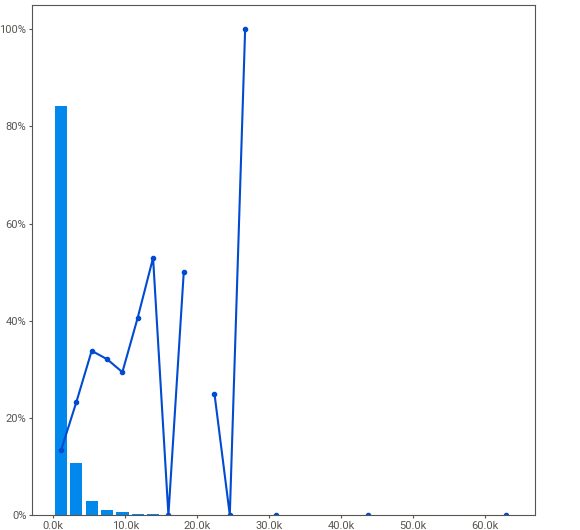
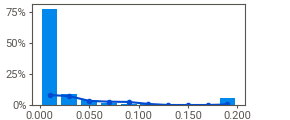
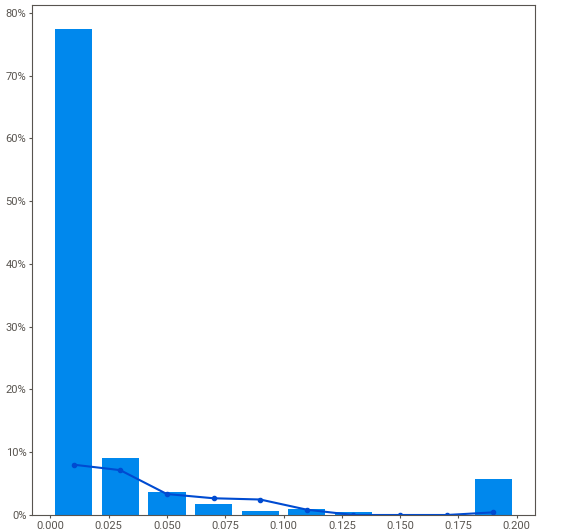
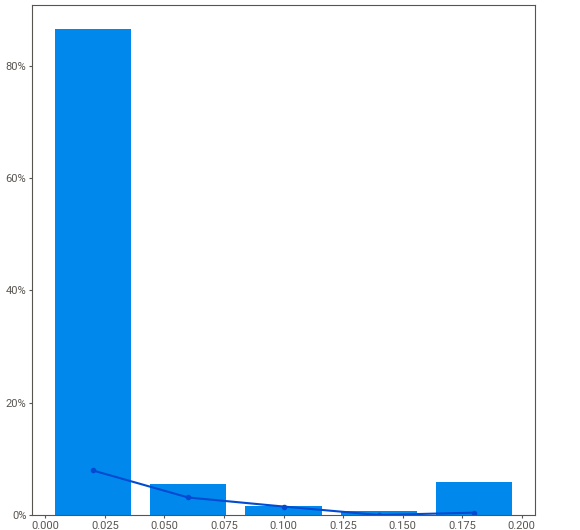
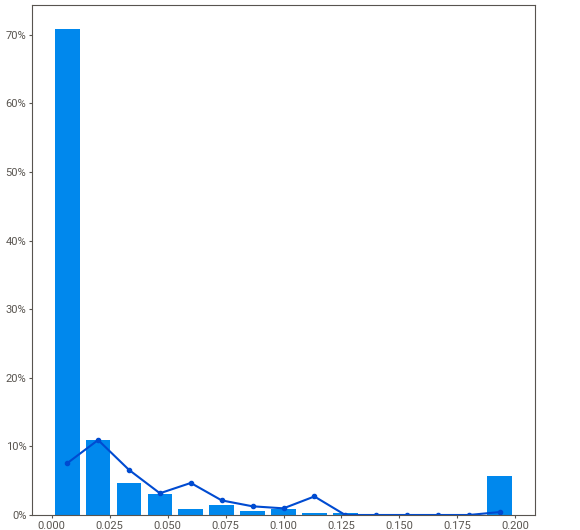
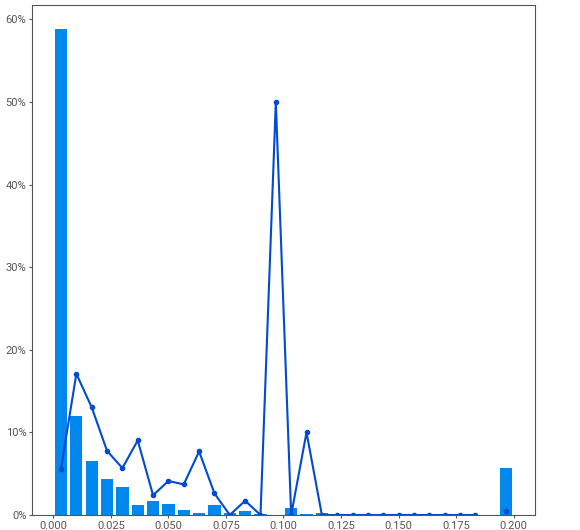
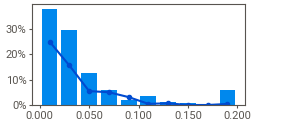
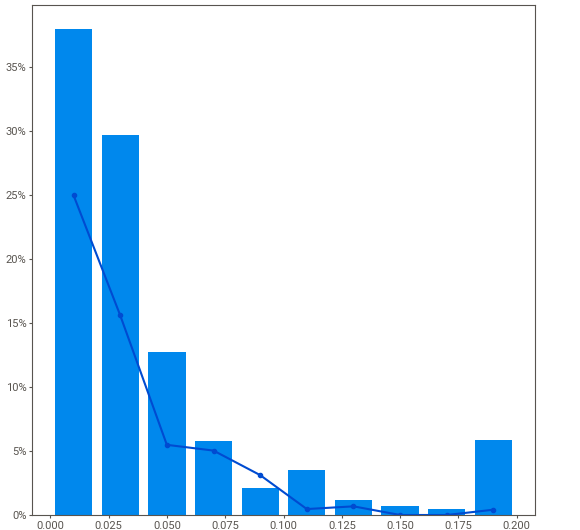
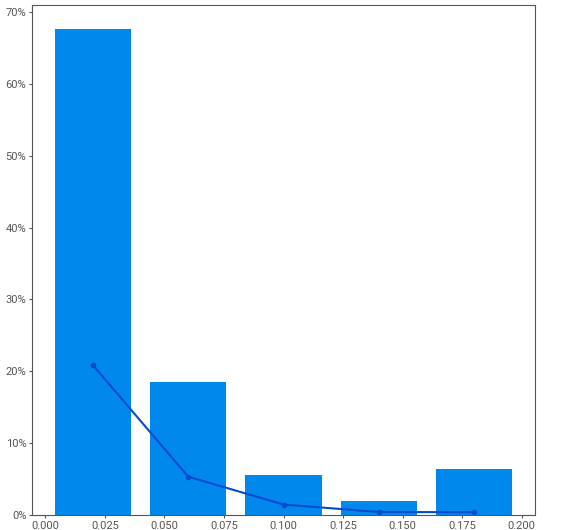
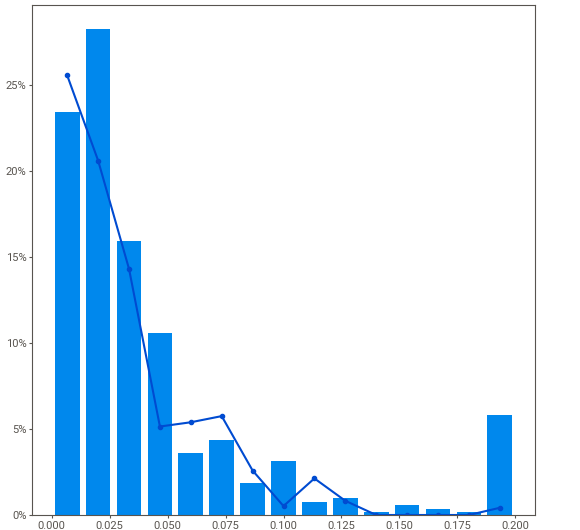
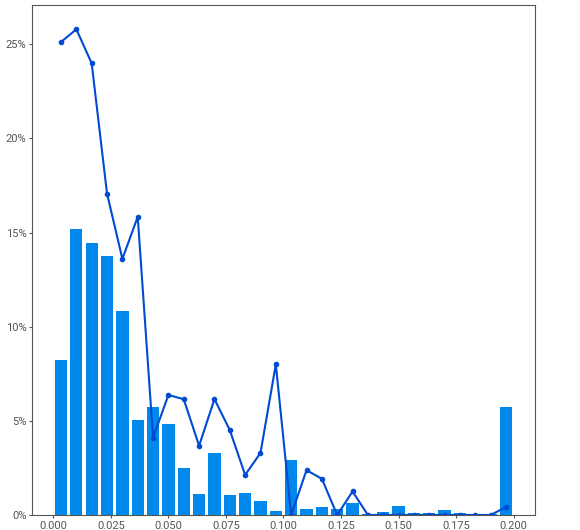
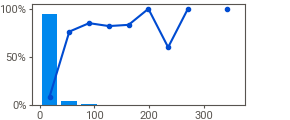
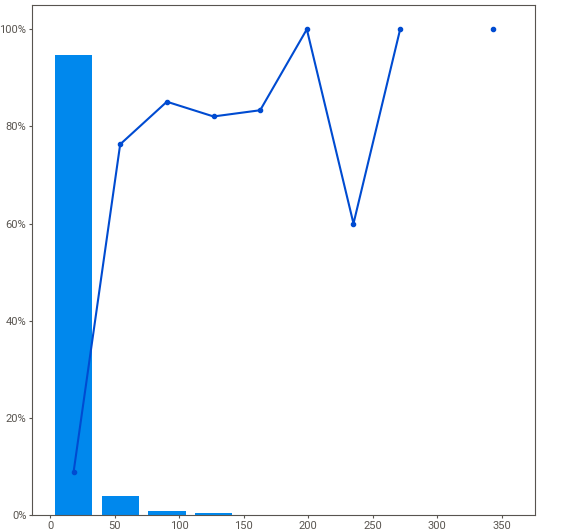
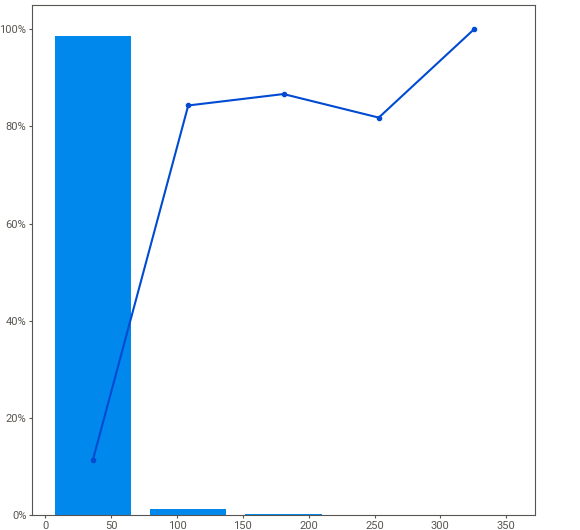
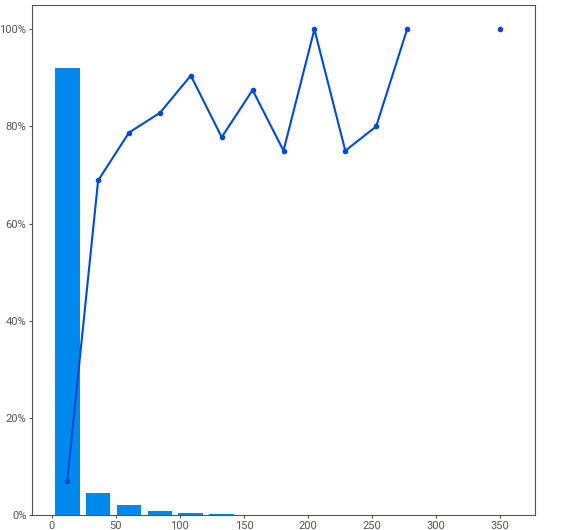
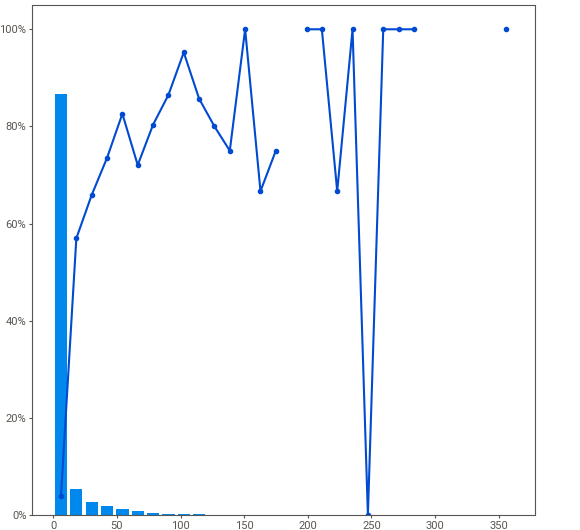
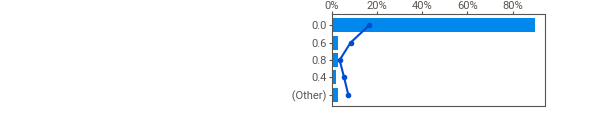
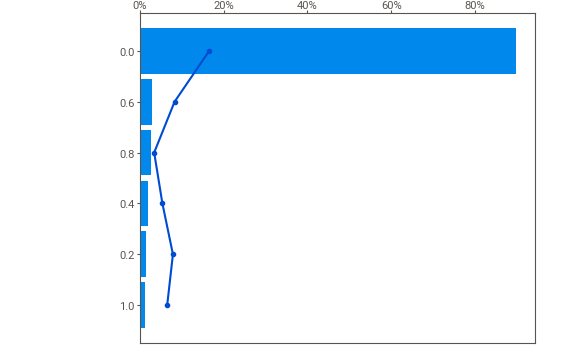
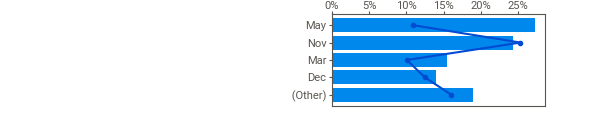
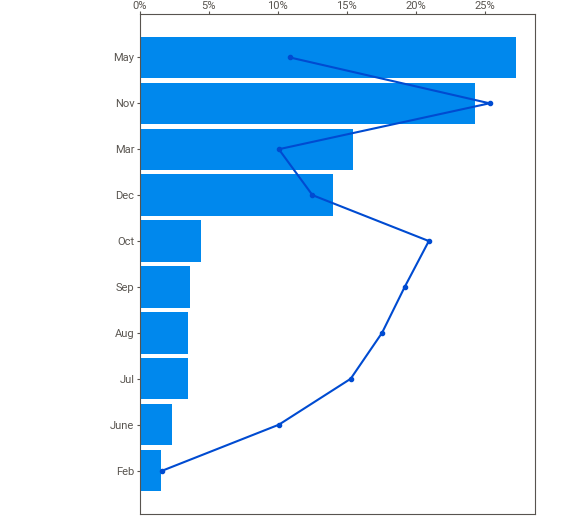
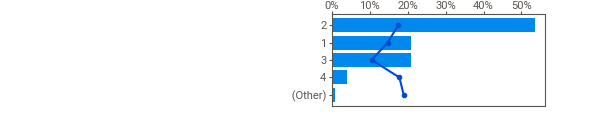
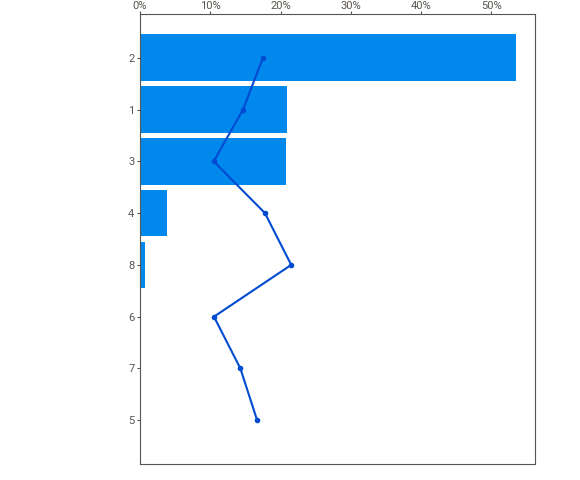
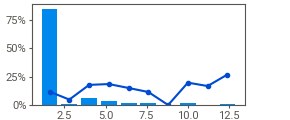
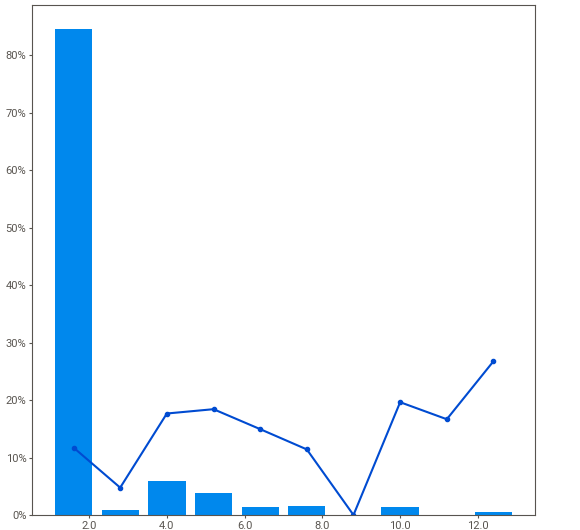
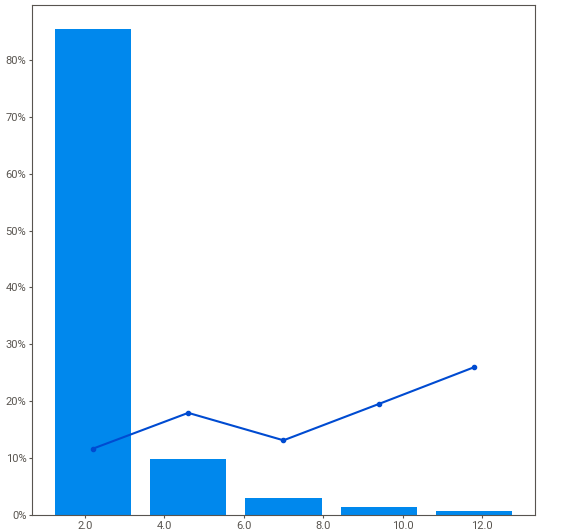
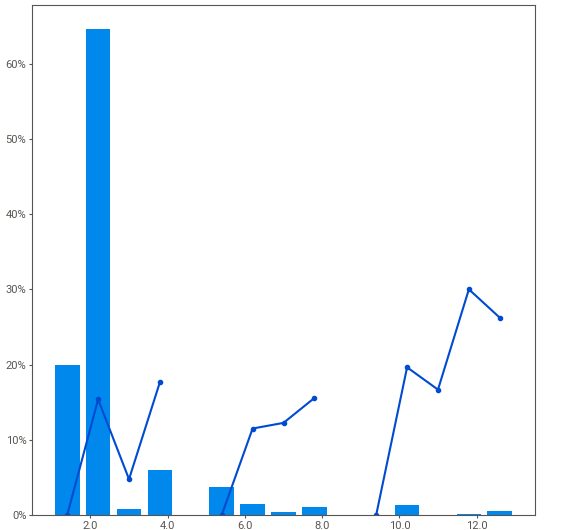
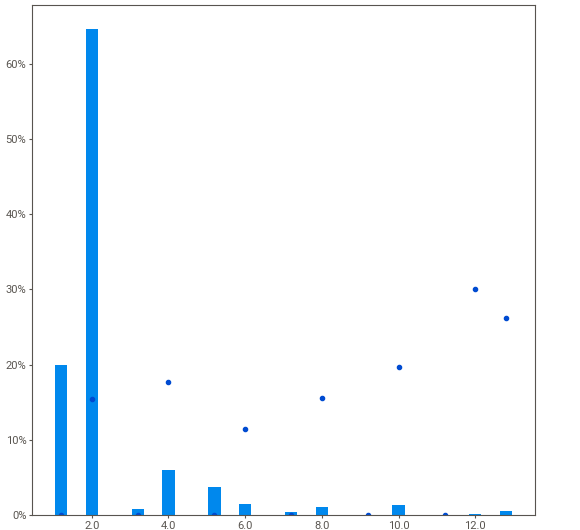
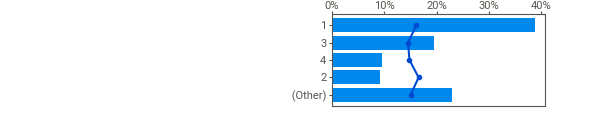
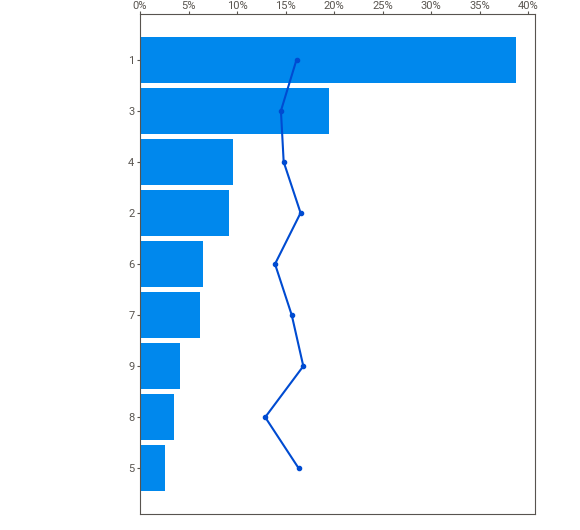
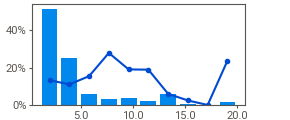
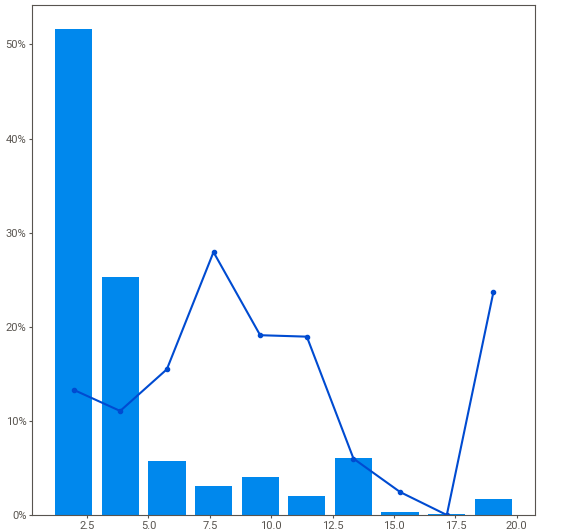
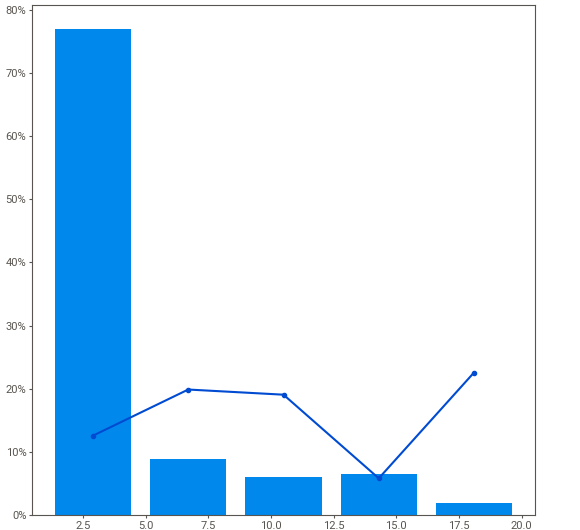
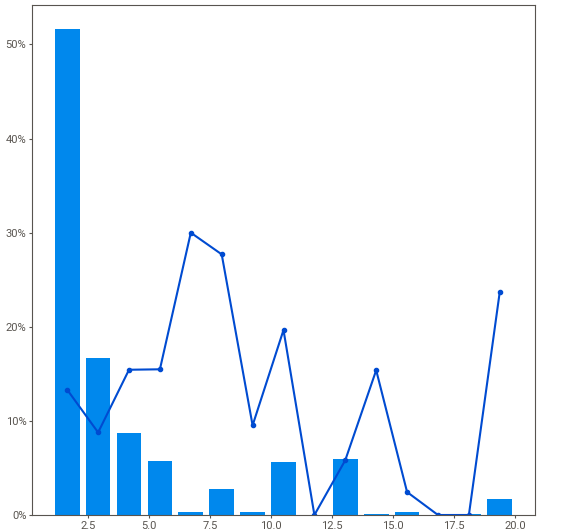
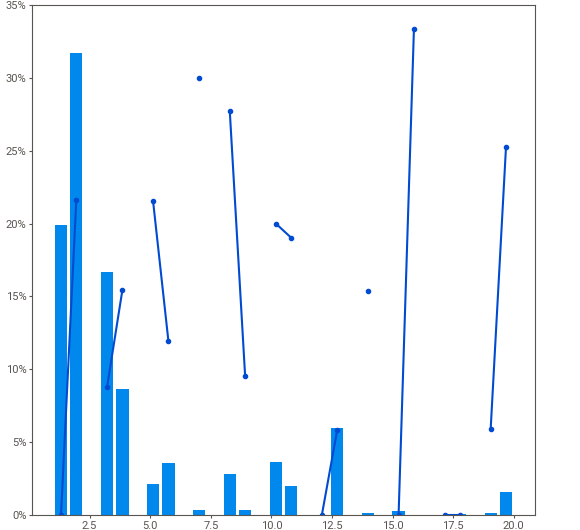
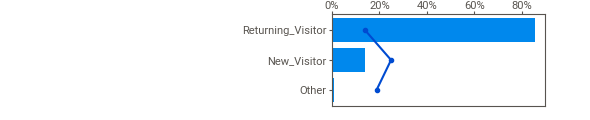
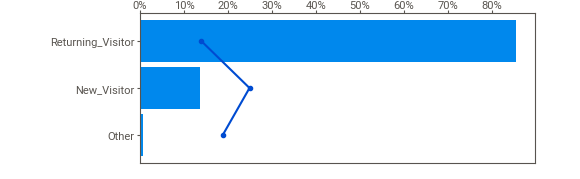
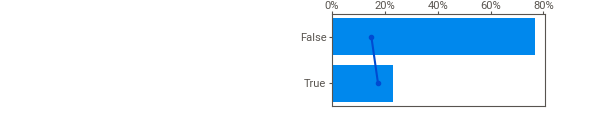
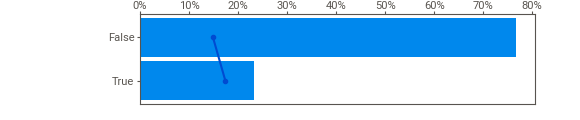
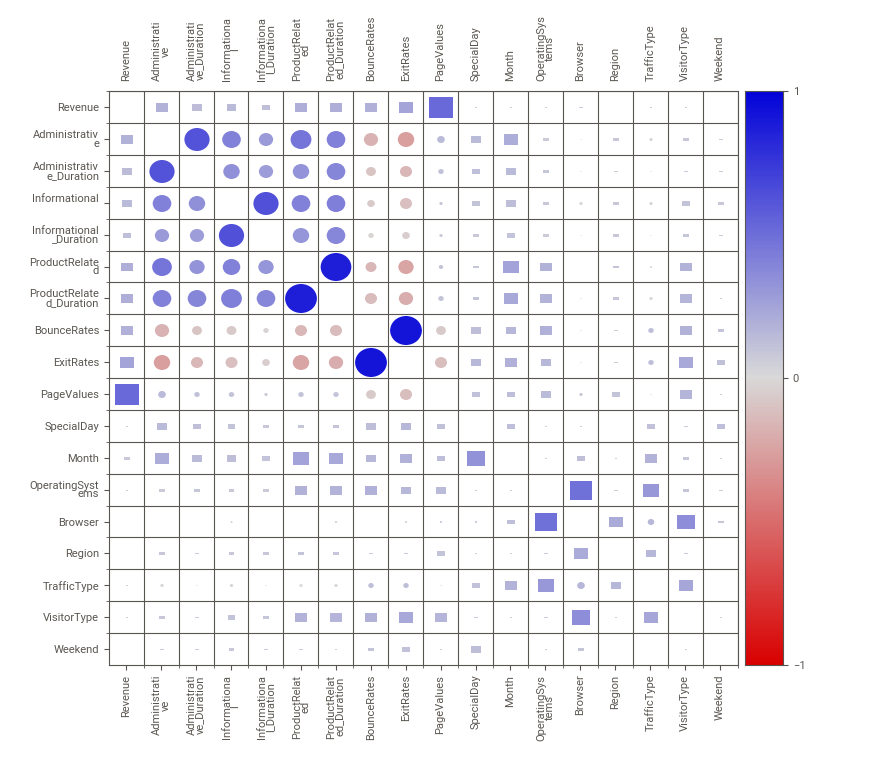
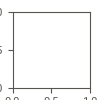

In [15]:
# we can also leverage sweetviz and do a quick and dirty EDA
import sweetviz as sv
sv.analyze(df, target_feat=target).show_notebook()

( 5 points) Train/test split

In [16]:
# Enough eyeballing, let's find the correlation between features

# but lets first split the dataset into train and test
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)

## Oops! Just reread the question and realized that we need to split monnth wise
df_training_months = df.loc[df['Month'].isin(['June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])]
df_test_months = df.loc[df['Month'].isin(['Feb', 'Mar'])]

X_train, y_train = df_training_months.drop(target, axis=1), df_training_months[target]
X_test, y_test = df_test_months.drop(target, axis=1), df_test_months[target]

In [17]:
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_test.shape)

(6875, 17)
(2091,)
(2091, 17)
(2091,)


In [18]:
# # Sanity check
# X_train.sample(5)
# #Visualize sale over the year
# df_training_months.groupby('Month')['Revenue'].sum().plot(kind='bar', title='Sales made by month', ylabel='Sales', xlabel='Month')

In [19]:
# df_test_months.groupby('Month')['Revenue'].sum().plot(kind='bar', title='Sales made by month', ylabel='Sales', xlabel='Month')

( 5 points) Advanced EDA

<Figure size 1600x800 with 0 Axes>

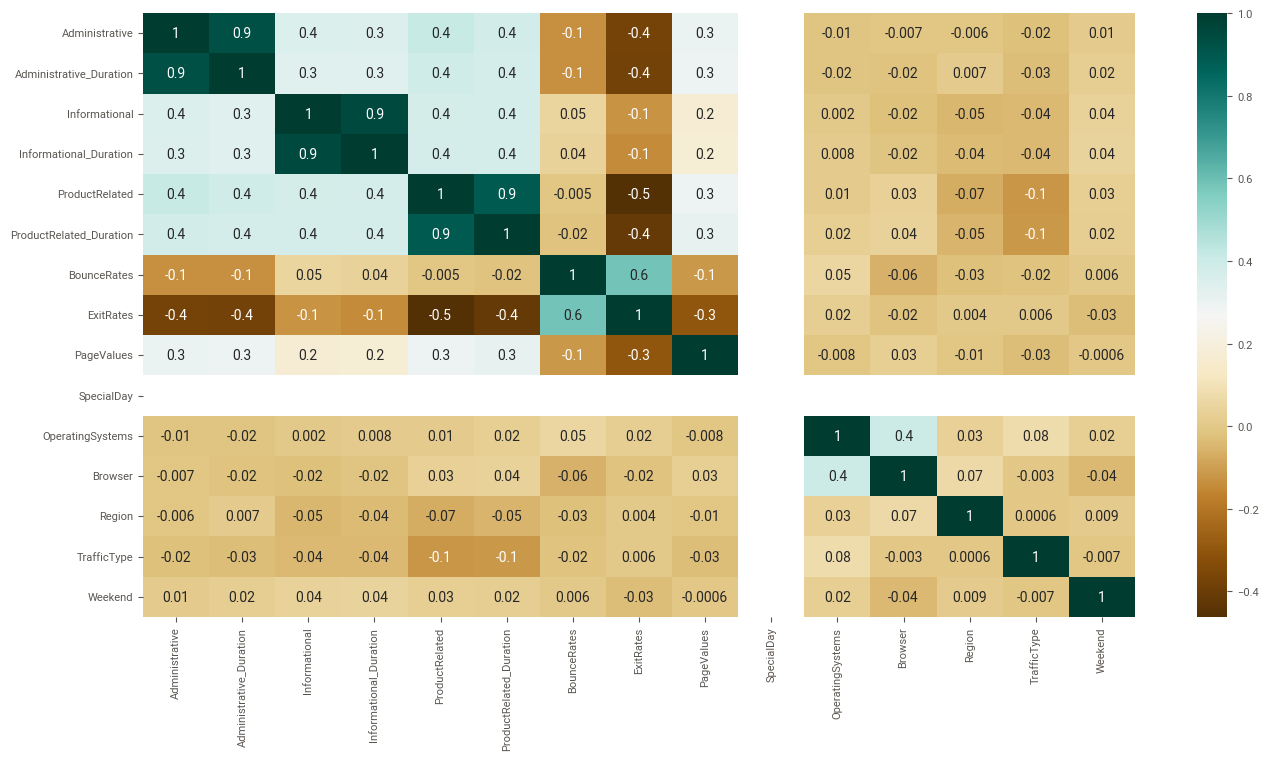

In [20]:
import seaborn as sns
plt.figure(figsize=(16, 8))
corr = X_train.corr(method='spearman')
heatmap = sns.heatmap(corr, annot=True, fmt='.1g', cmap='BrBG')

In [21]:
# It is apparent that we have atleast 3 features are more than 90% correlated and can be dropped
# Administrative, Administrative_Duration
# Informational, Informational_Duration
# ProductRelated, ProductRelated_Duration
repetative_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
X_train = X_train.drop(repetative_features, axis=1)
X_test = X_test.drop(repetative_features, axis=1)
num_features_original = num_features.copy() # save the original list of numerical features for segmenting later
for f in repetative_features:
    num_features.remove(f)

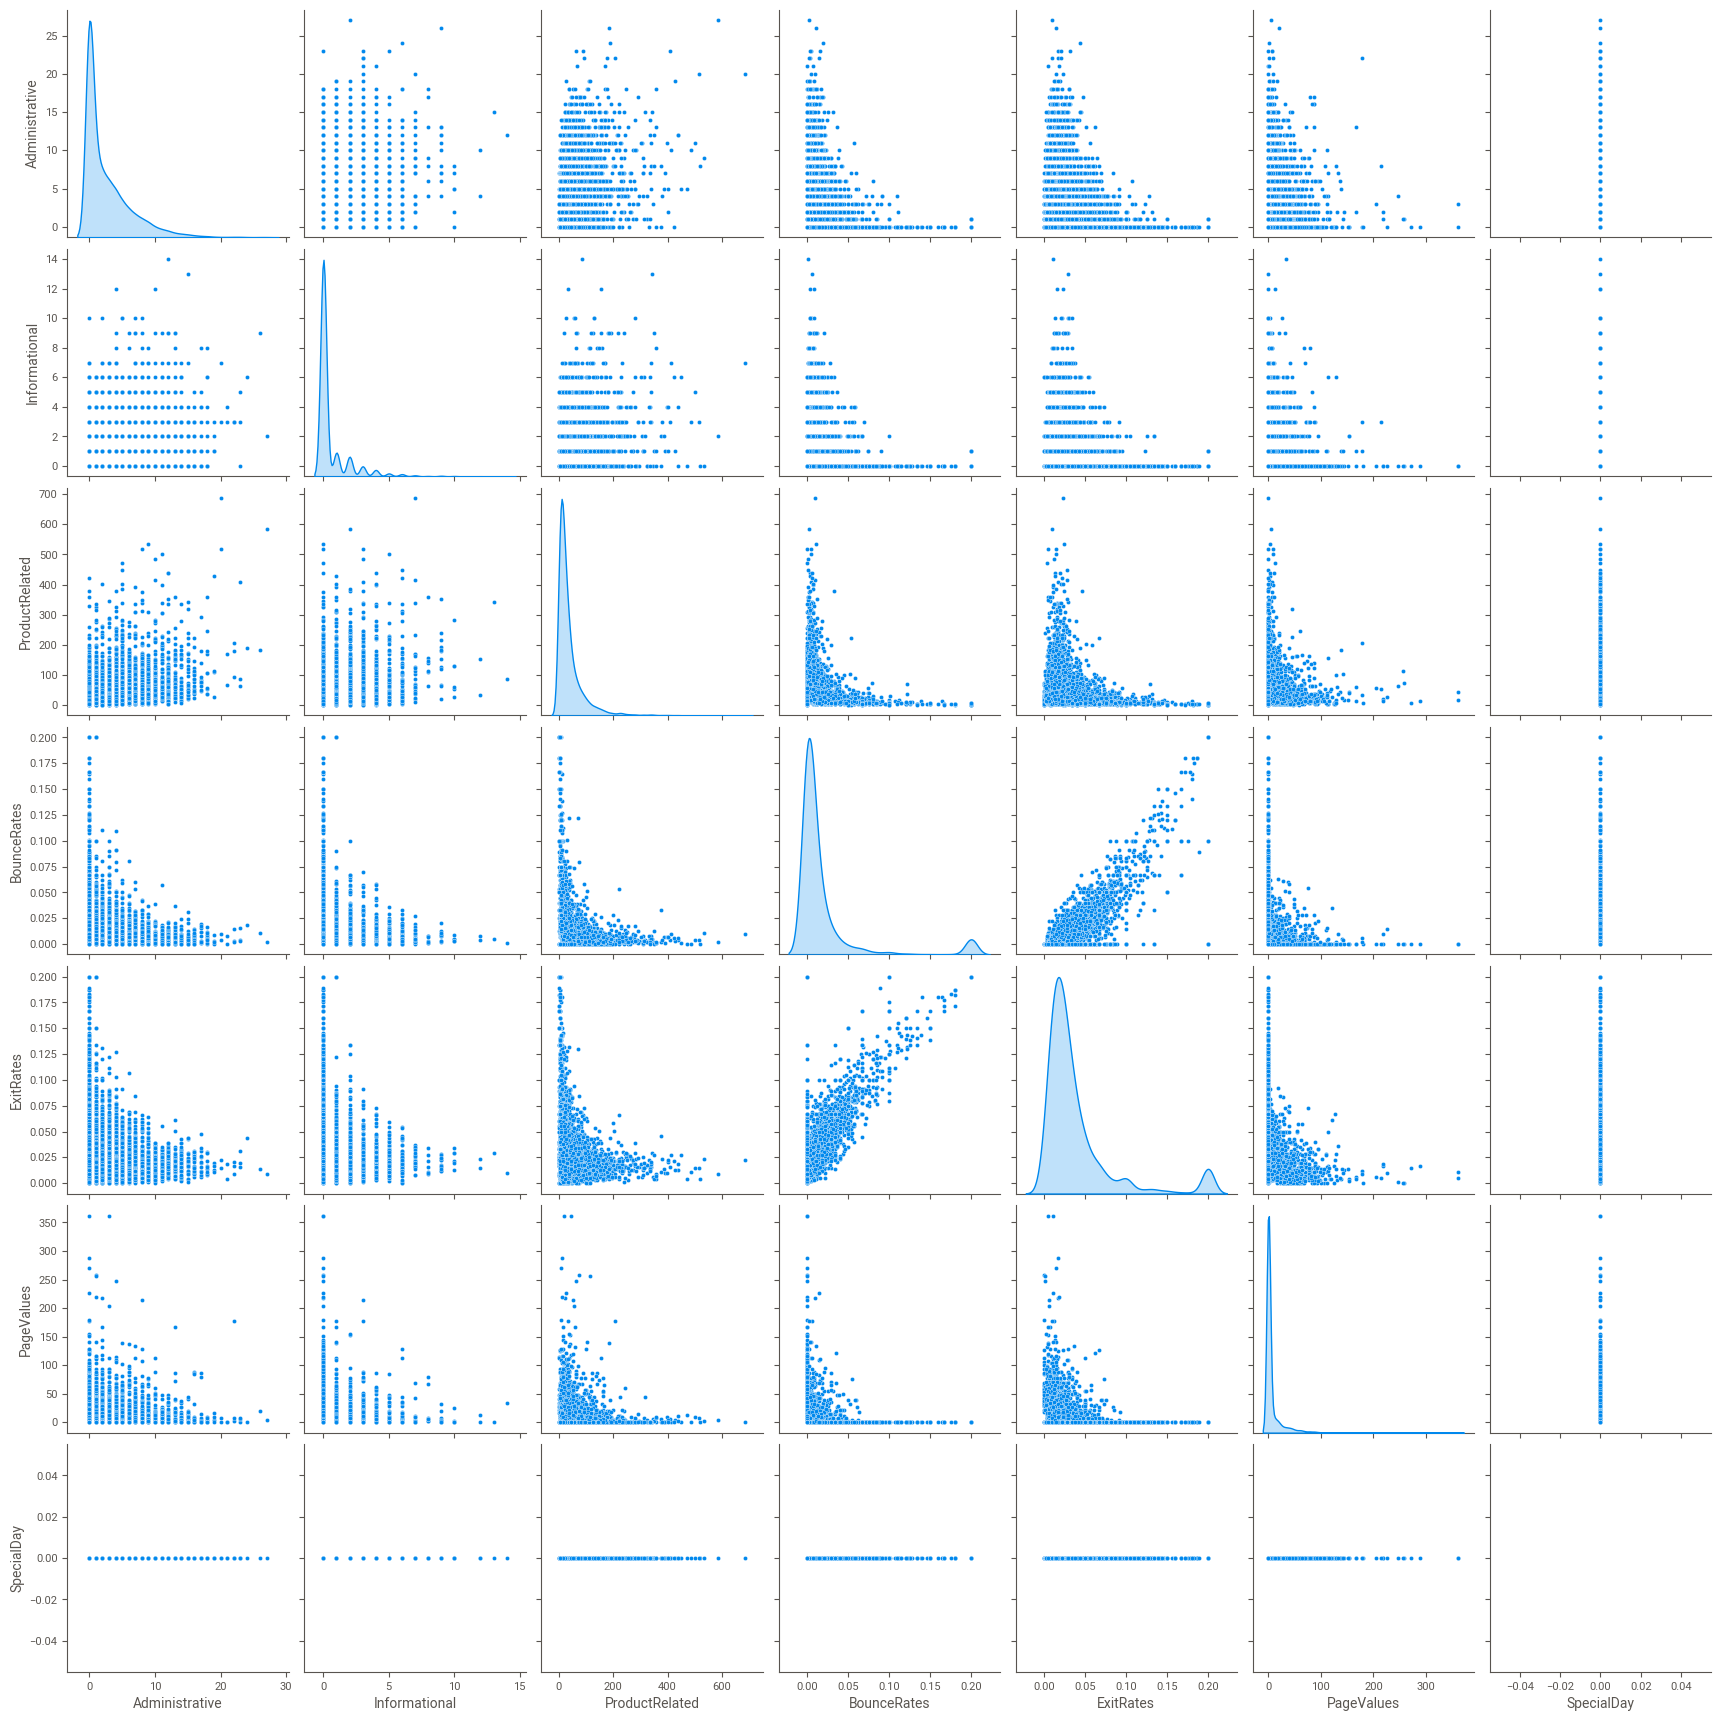

In [22]:
sns.pairplot(X_train[num_features], diag_kind='kde')

In [23]:
X_train.sample(5)

,Administrative,Informational,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
7552,7,0,43,0.030612,0.055782,0.000000,0.0,Jul,2,2,2,13,Returning_Visitor,False
10987,10,1,138,0.004027,0.014462,18.215795,0.0,Dec,2,2,1,6,Returning_Visitor,False
9849,6,2,41,0.000000,0.009929,3.836080,0.0,Dec,2,2,2,7,Returning_Visitor,False
5811,0,0,8,0.000000,0.025000,0.000000,0.0,Jul,1,1,3,3,Returning_Visitor,False
7267,4,0,22,0.003846,0.010470,0.000000,0.0,Nov,3,2,6,2,Returning_Visitor,True


In [24]:
## Lets try a simple logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


(15 points) Model fitting

In [25]:
# We don't need imputer, as there are no missing values
# However, we need to scale the numerical features
numeric_pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features),
        ('cat', categorical_pipeline, cat_features)
    ]
)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(class_weight='balanced'))
])

lr_model = pipeline.fit(X_train, y_train)
print(lr_model.score(X_test, y_test)) 
lr_pred = lr_model.predict(X_test)

0.9167862266857962


( 5 points) Performance points

In [26]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9167862266857962
precision: 0.5371024734982333
recall: 0.7794871794871795
f1 score: 0.6359832635983262
confusion matrix:
[[1765  131]
 [  43  152]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', RandomForestClassifier(n_estimators = 500, random_state = 42, min_samples_split = 10))
])

rf_model = pipeline.fit(X_train, y_train)
print(rf_model.score(X_test, y_test)) 
lr_pred = rf_model.predict(X_test)

0.9483500717360115


In [28]:
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9483500717360115
precision: 0.8175182481751825
recall: 0.5743589743589743
f1 score: 0.6746987951807228
confusion matrix:
[[1871   25]
 [  83  112]]


# 2. Customer Segmentation

(15 points) Clustering code

In [29]:
from sklearn.cluster import KMeans

In [30]:
df_seg = df.copy()
df_seg.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
# Lets convert everything to numerical

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features_original),
        ('cat', categorical_pipeline, cat_features)
    ]
)

def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
        model = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('kmeans', kmeans)])
        model.fit(X)
        inertias.append(kmeans.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

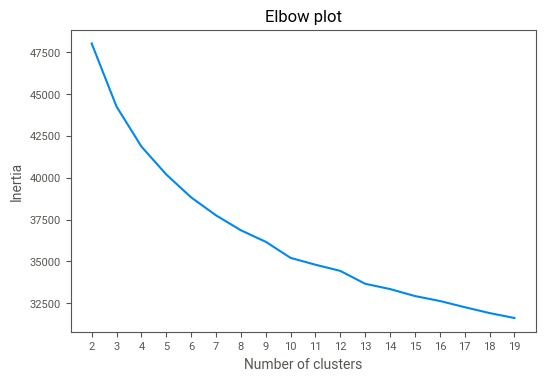

In [33]:
visualize_elbow(df_seg, range(2,20))

In [34]:
# There is a sharp elbow at 10, so lets try with 10 clusters, and a slight one at 5
kmeans = KMeans(n_clusters=10, random_state=42, init="k-means++")
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)])
y_kmeans = model.fit_predict(df_seg)
df_seg['Cluster'] = y_kmeans
df_seg.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
389,0,0.000000,0,0.0,8,551.166667,0.025000,0.035000,0.000000,0.0,Mar,3,2,2,3,Returning_Visitor,False,False,2
10438,6,218.571429,0,0.0,35,1760.613095,0.000000,0.013750,16.817726,0.0,Nov,2,2,3,2,Returning_Visitor,False,True,5
4835,0,0.000000,0,0.0,24,460.450000,0.016667,0.031944,0.000000,0.4,May,2,2,6,13,Returning_Visitor,False,False,9
4379,3,74.000000,0,0.0,14,584.333333,0.000000,0.003704,0.000000,0.0,May,2,2,3,5,New_Visitor,False,False,0
558,0,0.000000,0,0.0,7,221.500000,0.000000,0.028571,0.000000,0.0,Mar,4,1,1,3,Returning_Visitor,False,False,7


In [35]:
for i in range(0, len(np.unique(kmeans.labels_))):
    print('Cluster label ', i, 'number of points', np.bincount(kmeans.labels_)[i])

Cluster label  0 number of points 1020
Cluster label  1 number of points 835
Cluster label  2 number of points 1636
Cluster label  3 number of points 1028
Cluster label  4 number of points 1243
Cluster label  5 number of points 1390
Cluster label  6 number of points 785
Cluster label  7 number of points 1813
Cluster label  8 number of points 1288
Cluster label  9 number of points 1292


<AxesSubplot:title={'center':'Sales made by cluster'}, xlabel='Cluster', ylabel='Sales'>

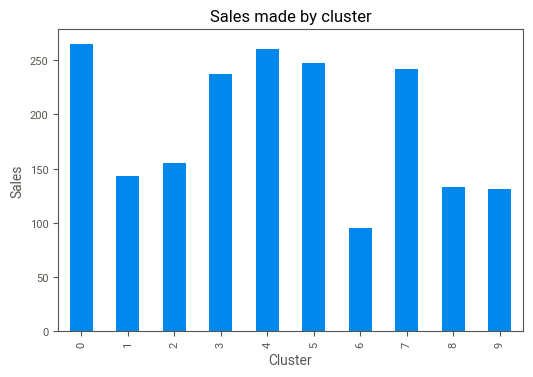

In [36]:
df_seg.groupby('Cluster')['Revenue'].sum().plot(kind='bar', title='Sales made by cluster', ylabel='Sales', xlabel='Cluster')

## Task 3. Semi-Supervised Learning (15 points)

( 2 points) Correctly splits the data by month into labeled, unlabeled, and test

In [37]:
df_lab = df.loc[df['Month'].isin(['June', 'Jul', 'Aug', 'Sep'])]

df_unlab = df.loc[df['Month'].isin(['Oct', 'Nov', 'Dec'])]
df_unlab = df_unlab.assign(Revenue = np.nan)

df_test = df.loc[df['Month'].isin(['Feb', 'Mar'])] 

In [38]:
# df_unlabel.info()
X_train_lab, y_train_lab = df_lab.drop(target, axis=1), df_lab[target]
X_train_unlab, y_train_unlab = df_unlab.drop(target, axis=1), df_unlab[target]
X_test, y_test = df_test.drop(target, axis=1), df_test[target]

In [39]:
print('Labeled Train Set:', X_train_lab.shape, y_train_lab.shape)
print('Unlabeled Train Set:', X_train_unlab.shape, y_train_unlab.shape)
# summarize test set size
print('Test Set:', X_test.shape, y_test.shape)

Labeled Train Set: (1601, 17) (1601,)
Unlabeled Train Set: (5274, 17) (5274,)
Test Set: (2091, 17) (2091,)


In [40]:
y_train_unlab.info()

<class 'pandas.core.series.Series'>
Int64Index: 5274 entries, 5455 to 12329
Series name: Revenue
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 82.4 KB


(8 points) Generate labels for unlabeled samples with a self labeling technique

In [41]:
# use a logistic regression algorithm fit on the labeled portion of the training dataset.
from sklearn.metrics import accuracy_score

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features_original),
        ('cat', categorical_pipeline, cat_features)
    ]
)

# define model
# and fit model on labeled dataset
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LogisticRegression(class_weight='balanced'))
])

# make predictions on hold out test set
pipeline.fit(X_train_lab, y_train_lab)
yhat = pipeline.predict(X_test)

# calculate score for test set
score = accuracy_score(y_test, yhat)
# summarize score
print('Accuracy: %.3f' % (score*100))



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('cat',
                                         

Accuracy: 80.440


In [42]:
# Troubleshooting 

# print(X_train_lab.shape)
# print(X_train_unlab.shape)
# print(y_train_lab.shape)
# print(y_train_unlab.shape)
# print(type(y_train_unlab))
# print(type(y_train_lab))
# print(type(X_train_unlab))
# print(type(X_train_lab))
# print(X_train_lab)

In [43]:
# Evaluate label propagation on the semi-supervised learning dataset
# from numpy import concatenate
from sklearn.semi_supervised import LabelPropagation

# create the training dataset input
# X_train_mixed = concatenate((X_train_lab, X_train_unlab))
X_train_mixed = pd.concat([X_train_lab, X_train_unlab])
# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_train_unlab))]
# recombine training dataset labels
y_train_mixed = pd.concat([y_train_lab, pd.Series(nolabel)])

# fit model on mixed dataset
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LabelPropagation())
])

# make predictions on hold out test set
pipeline.fit(X_train_mixed, y_train_mixed)
yhat_mix = pipeline.predict(X_test)

# # calculate score for test set
score = accuracy_score(y_test, yhat_mix)
# summarize score
print('Accuracy: %.3f' % (score*100))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues',
                                                   'SpecialDay']),
                                                 ('cat',
                                         

Accuracy: 86.896


(5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels

In [44]:
from sklearn.metrics import classification_report

print("Performance report on labels only training")
print(classification_report(y_test, yhat))

print("Performance report on labels and self-labels training")
print(classification_report(y_test, yhat_mix))

Performance report on labels only training
              precision    recall  f1-score   support

       False       0.98      0.80      0.88      1896
        True       0.30      0.85      0.45       195

    accuracy                           0.80      2091
   macro avg       0.64      0.82      0.66      2091
weighted avg       0.92      0.80      0.84      2091

Performance report on labels and self-labels training
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      1896
        True       0.14      0.08      0.10       195

    accuracy                           0.87      2091
   macro avg       0.52      0.51      0.51      2091
weighted avg       0.84      0.87      0.85      2091

